Задание 1
Написать программу для распознания цифр из графический файлов.

Решение.
Это задача классификации. Всего 10 классов, столько же, сколько и цифр - от 0 до 9. Наша задача, определить, к какому классу относится изображение.

In [ ]:
import tensorflow as tf # библотека для глубокого обучения нейронных сетей
import numpy as np # библотека для работы с массивами
import matplotlib.pyplot as plt # библиотека для визуализации данных
import imageio # библиотека для работы с изображениями



---

Загрузка обучающей и тестовой выборок - массив данных MNIST. На обучающей выборке обучаем нейронную сеть, на тестовой - проверяем, насколько хорошо нейронная сеть обучилась.

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()



---
Numpy-массив x_test состоит из 10 000 элементов (это примеры). Каждый элемент представляет из себя другой массив размером 28X28. В массивах x_train, x_test хранятся изображения цифр в виде Numpy-массива, где эти изображения размерами 28X28 пикселей и где каждый пиксель представляет собой яркость этого пикселя от 0 до 255.

Numpy-массив y_test состоит из 10 000 элементов. Здесь хранятся числа - ответы к изображениям (выходы).


In [ ]:
print("Изображения цифр (10 000 эл-тов, каждый из которых - массив размером 28X28):")
print(x_test.shape) # изображения цифр в виде Numpy-массива, где эти изображения размерами 28X28 пикселей и где каждый пиксель представляет собой яркость этого пикселя от 0 до 255

print("\nЦифры:")
print(y_test.shape) # числа - ответы к изображениям

Изображения цифр (10 000 эл-тов, каждый из которых - массив размером 28X28):
(10000, 28, 28)

Цифры:
(10000,)


---
Отрисовка первых 16-ти цифр. Подписи под изображениями из y_train.



Отрисовка  первых 16-ти цифр. Подписи под изображениями из y_train:


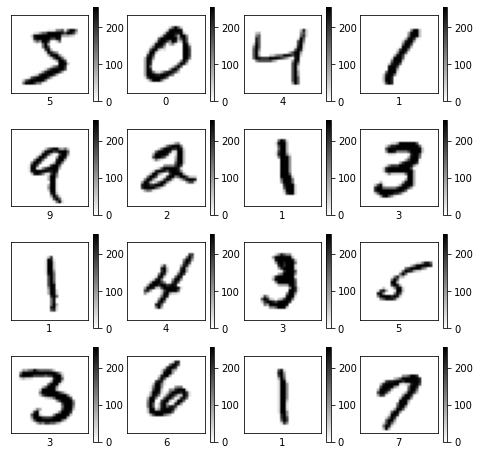

In [ ]:
print("\nОтрисовка  первых 16-ти цифр. Подписи под изображениями из y_train:")
plt.figure(figsize=(8, 8)) # Создание новой фигуры
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.xticks([]) # Получить или установить текущие положения делений и метки оси x
  plt.yticks([]) # Получить или установить текущие положения делений и метки оси y
  plt.grid(False) # Настройка линии сетки - она убирается
  plt.imshow(x_train[i], cmap=plt.cm.binary) # Отображать данные как изображение; т.е. на обычном 2D-растре. Входными данными могут быть фактические данные RGB (A) или 2D скалярные данные, которые будет отображаться как псевдоцветное изображение.
  plt.colorbar() # Добавление шкалы цвета к графику
  plt.xlabel(y_train[i]) # Добавление метки для оси x - ответы
plt.show()



---

Для обучения нейронной сети приведем данные к нормальному виду: яркость пикселей должна измеряться от 0 до 1, поэтому каждый из массивов разделим на 255.

In [ ]:
x_train = x_train / 255
x_test = x_test / 255



---

Создаем модель нейроной сети из двух слоев, где первый будет слоем трансормации в новую размерность. На вход подаем один пареметр - размер нашего массива. Этот слой распрямит массив и превратит в одномерный массив длиной 28X28.

Второй слой принимает на себя два параметра - первый это кол-во нейронов (10 нетйронов, где каждый нейрон будет соответсовать классу цифр от 0 до 10), второй параметр - функция активации SoftMax, скрытый слой (512 нейронов)

In [ ]:
model = tf.keras.models.Sequential([
       tf.keras.layers.Conv2D(
           input_shape=(28, 28, 1),
           filters=32,
           kernel_size=(5, 5),
           padding='same',
           activation='relu'
       ),
       tf.keras.layers.MaxPool2D(pool_size=(2, 2)), 
       tf.keras.layers.Conv2D(
           input_shape=(28, 28, 1),
           filters=64,
           kernel_size=(5, 5),
           padding='same',
           activation='relu'
       ),
       tf.keras.layers.MaxPool2D(pool_size=(2, 2)),                             
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1024, activation=tf.nn.relu),
       tf.keras.layers.Dense(10, activation=tf.nn.softmax)                             
])



---
После создания архитектуры модели нейронной сети необходимо модель скомпилировать. Она будет принимать 3 параметра - оптимизатор, функция потерь (будет считать ошибку нейронной сети при обучении с учителем), метирика (будем считать точность).


In [ ]:
model.compile(
    optimizer='adamax',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



---
Обучение модели нейронной сети. Также есть 3 параметра - тренировочный набор данных x_train, ответы на изображения массив y_train, кол-во эпох (то кол-во раз, сколько нейронная будет прогонять через себя тренировочный набор данных).


In [ ]:
model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=13)

Epoch 1/13
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0021 - accuracy: 0.9994
Epoch 2/13
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 3/13
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0013 - accuracy: 0.9996
Epoch 4/13
1875/1875 [==============================] - 14s 7ms/step - loss: 8.2289e-04 - accuracy: 0.9998
Epoch 5/13
1875/1875 [==============================] - 14s 7ms/step - loss: 6.1984e-04 - accuracy: 0.9998
Epoch 6/13
1875/1875 [==============================] - 14s 7ms/step - loss: 6.4294e-04 - accuracy: 0.9998
Epoch 7/13
1875/1875 [==============================] - 14s 7ms/step - loss: 3.9735e-04 - accuracy: 0.9999
Epoch 8/13
1875/1875 [==============================] - 14s 7ms/step - loss: 3.3766e-04 - accuracy: 0.9999
Epoch 9/13
1875/1875 [==============================] - 14s 7ms/step - loss: 2.9162e-04 - accuracy: 0.9999
Epoch 10/13
1875/1875 [==========================



---
Проверка качества обучения нейронной сети на тестовом наборе. Всего 2 параметра - тестовый массив с изображениями и тестовый массив с цифрами.


In [ ]:
print("\nПроверка качества обучения нейронной сети на тестовом наборе:")
print(model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test))


Проверка качества обучения нейронной сети на тестовом наборе:
313/313 [==============================] - 1s 4ms/step - loss: 0.0323 - accuracy: 0.9932
[0.03227013722062111, 0.9932000041007996]




---

Загрузка в нейронную сеть изображение цифры. Для этого напишем отдельную функцию *model_answer*, которая принимает 3 параметра - обученная модель нейронной сети, имя файла (имя изображения, который загружаем), отрсиовка наших изображений.

In [ ]:
def model_answer(model, filename, display=True):
  image = imageio.imread(filename)
  image = np.mean(image, 2, dtype=float) # пребразование изображения
  image = image / 255
  if display:
    # отрисовка изображения
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(filename)
    plt.show()

  image = np.expand_dims(image, 0)
  image = np.expand_dims(image, -1)
  print (model.predict(image))
  #print (model.predict.np.argmax(image))
  return np.argmax(model.predict(image))

0.png
[[9.8252743e-01 4.2777385e-05 1.3824938e-03 2.7770086e-04 1.1434647e-05
  4.8147675e-05 2.1433659e-04 1.4422376e-03 1.8443693e-04 1.3869144e-02]]
Имя файла:  0.png 	Ответ сети:  0
1.png
[[1.7639676e-03 3.4918654e-01 2.7788075e-02 3.1016940e-02 4.9676360e-03
  9.1250328e-04 1.8597952e-04 5.7387406e-01 3.6284951e-03 6.6758199e-03]]
Имя файла:  1.png 	Ответ сети:  7
2.png
[[1.6737568e-17 2.3498461e-17 9.9999976e-01 1.8326334e-07 1.9133398e-28
  5.2623857e-20 1.3867919e-20 2.9964095e-17 2.8784314e-18 1.0344040e-21]]
Имя файла:  2.png 	Ответ сети:  2
3.png
[[2.6171352e-07 5.3181989e-06 9.1440734e-06 9.9989986e-01 1.3684406e-08
  3.9857863e-05 3.8923435e-08 2.3262261e-05 1.0782811e-05 1.1346108e-05]]
Имя файла:  3.png 	Ответ сети:  3
4.png
[[3.9335835e-04 2.1384056e-03 7.5445189e-03 3.9127157e-05 9.8710465e-01
  1.2327844e-04 6.3474945e-05 9.2137256e-04 1.7864126e-05 1.6538878e-03]]
Имя файла:  4.png 	Ответ сети:  4
5.png
[[7.6763449e-08 5.4422043e-07 3.7571553e-08 8.4089152e-05 1.7288

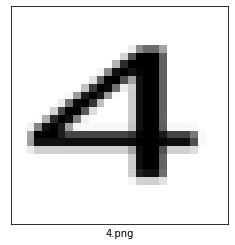

[[3.9335835e-04 2.1384056e-03 7.5445189e-03 3.9127157e-05 9.8710465e-01
  1.2327844e-04 6.3474945e-05 9.2137256e-04 1.7864126e-05 1.6538878e-03]]
4


In [ ]:
for i in range(10):
  filename = f'{i}.png'
  print(filename)
  print('Имя файла: ', filename, '\tОтвет сети: ', model_answer(model, filename, False))
  
print(model_answer(model, '4.png')) # отрисовка
